# Set Up

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# num_training_steps = num_epochs * len(train_dataloader)

In [2]:
experiments = [
    "fam-sim",
    "hc-100",
    "hc-200",
    "hc-400",
    "rnadist-100",
    "rnadist-200",
    "rnadist-400",
    "samples-100",
    "samples-200",
    "samples-400",
]
palette = {
    "rnadist-100": "#7C87E9",
    "rnadist-200": "#2534BB",
    "rnadist-400": "#09157E",
    "samples-100": "#F189F5",
    "samples-200": "#A42E8A",
    "samples-400": "#8E0638",
    "hc-100": "#67DD67",
    "hc-200": "#0F690F",
    "hc-400": "#1a921a",
    "fam-sim": "#b3500e",
    "SincFold": "gray",
}

In [3]:
sincfold_f1 = {
    "16s": 0.391664,
    "23s": 0.402430,
    "5s": 0.438967,
    "RNaseP": 0.442618,
    "grp1": 0.349969,
    "srp": 0.249175,
    "tRNA": 0.685143,
    "telomerase": 0.154173,
    "tmRNA": 0.350146,
}
# Crear DataFrame para sincfold
df_sincfold = pd.DataFrame(
    {
        "fam": list(sincfold_f1.keys()),
        "f1_post": list(sincfold_f1.values()),
        "modelo": "sincfold",
    }
)

# 5 epochs

In [4]:
hc_5 = pd.read_csv("results/tables/5e/hc_5e_f1_post_test.csv")
rdist_5 = pd.read_csv("results/tables/5e/rnadist_5e_f1_post_test.csv")
samples_5 = pd.read_csv("results/tables/5e/samples_5e_f1_post_test.csv")


dft_5 = pd.merge(hc_5, rdist_5, left_on=["fam", "fam-sim"], right_on=["fam", "fam-sim"])
df_5 = pd.merge(
    dft_5, samples_5, left_on=["fam", "fam-sim"], right_on=["fam", "fam-sim"]
)
df_5

,fam,fam-sim,hc-100,hc-200,hc-400,rnadist-100,rnadist-200,rnadist-400,samples-100,samples-200,samples-400
0,16s,0.369,0.377,0.344,0.386,0.370,0.370,0.386,0.368,0.375,0.368
1,23s,0.298,0.403,0.430,0.435,0.410,0.434,0.429,0.396,0.422,0.431
2,5s,0.412,0.498,0.525,0.515,0.494,0.525,0.521,0.424,0.496,0.459
3,RNaseP,0.432,0.461,0.450,0.343,0.463,0.451,0.461,0.448,0.452,0.421
4,grp1,0.369,0.381,0.399,0.392,0.378,0.389,0.394,0.392,0.393,0.360
5,srp,0.225,0.261,0.278,0.193,0.269,0.277,0.201,0.279,0.253,0.239
6,tRNA,0.644,0.595,0.660,0.647,0.593,0.654,0.690,0.587,0.586,0.646
7,telomerase,0.196,0.227,0.187,0.187,0.226,0.187,0.173,0.214,0.171,0.210
8,tmRNA,0.331,0.343,0.361,0.347,0.338,0.355,0.347,0.342,0.351,0.349


In [5]:
hc_5

,fam,fam-sim,hc-100,hc-200,hc-400
0,16s,0.369,0.377,0.344,0.386
1,23s,0.298,0.403,0.430,0.435
2,5s,0.412,0.498,0.525,0.515
3,RNaseP,0.432,0.461,0.450,0.343
4,grp1,0.369,0.381,0.399,0.392
5,srp,0.225,0.261,0.278,0.193
6,tRNA,0.644,0.595,0.660,0.647
7,telomerase,0.196,0.227,0.187,0.187
8,tmRNA,0.331,0.343,0.361,0.347


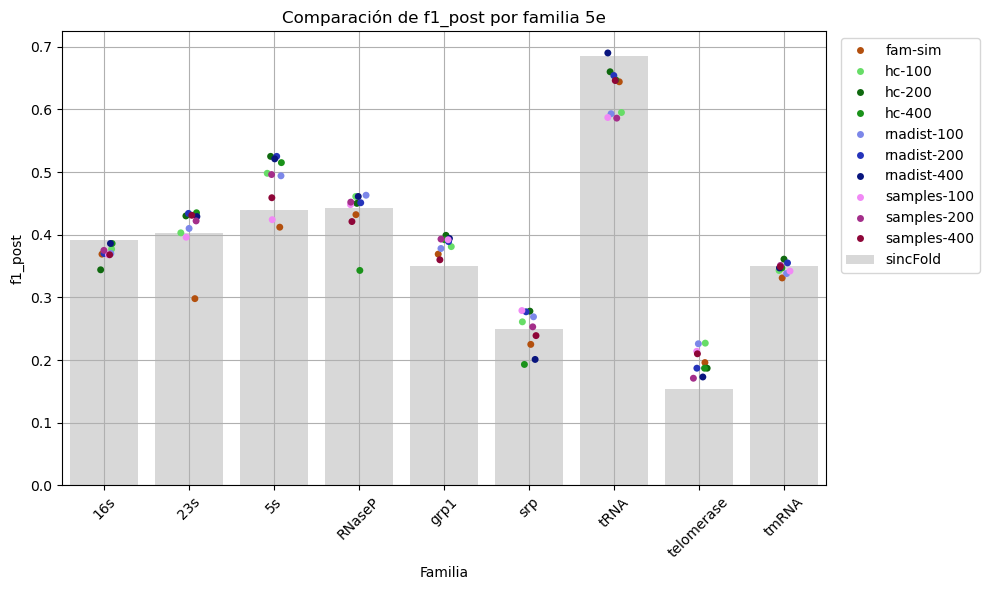

In [6]:
# Transformar a formato long
dfl_5 = df_5.melt(
    id_vars="fam",
    value_vars=experiments,
    var_name="modelo",
    value_name="f1_post",
)

# Visualización categórica
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=dfl_5,
    x="fam",
    y="f1_post",
    hue="modelo",
    palette=palette,
)

sns.barplot(
    data=df_sincfold,
    x="fam",
    y="f1_post",
    color="gray",
    alpha=0.3,
    errorbar=None,
    label="sincFold",
)

plt.grid()
plt.title("Comparación de f1_post por familia 5e")
plt.ylabel("f1_post")
plt.xlabel("Familia")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1))
plt.tight_layout()
plt.show()

# 10 epochs

In [7]:
hc_10 = pd.read_csv("results/tables/10e/hc_10e_f1_post_test.csv")
rdist_10 = pd.read_csv("results/tables/10e/rnadist_10e_f1_post_test.csv")
samples_10 = pd.read_csv("results/tables/10e/samples_10e_f1_post_test.csv")

dft_10 = pd.merge(
    hc_10, rdist_10, left_on=["fam", "fam-sim"], right_on=["fam", "fam-sim"]
)
df_10 = pd.merge(
    dft_10, samples_10, left_on=["fam", "fam-sim"], right_on=["fam", "fam-sim"]
)
df_10

,fam,fam-sim,hc-100,hc-200,hc-400,rnadist-100,rnadist-200,rnadist-400,samples-100,samples-200,samples-400
0,16s,0.311,0.337,0.359,0.356,0.343,0.352,0.363,0.335,0.342,0.335
1,23s,0.290,0.393,0.390,0.374,0.437,0.406,0.302,0.379,0.387,0.304
2,5s,0.348,0.461,0.471,0.408,0.371,0.445,0.424,0.417,0.269,0.380
3,RNaseP,0.332,0.454,0.413,0.377,0.432,0.404,0.390,0.421,0.435,0.406
4,grp1,0.298,0.414,0.357,0.368,0.425,0.404,0.283,0.317,0.335,0.357
5,srp,0.210,0.288,0.274,0.228,0.291,0.261,0.215,0.219,0.234,0.208
6,tRNA,0.645,0.569,0.674,0.688,0.596,0.675,0.623,0.646,0.627,0.667
7,telomerase,0.119,0.209,0.168,0.151,0.181,0.162,0.170,0.180,0.137,0.191
8,tmRNA,0.271,0.331,0.332,0.292,0.368,0.327,0.322,0.319,0.290,0.259


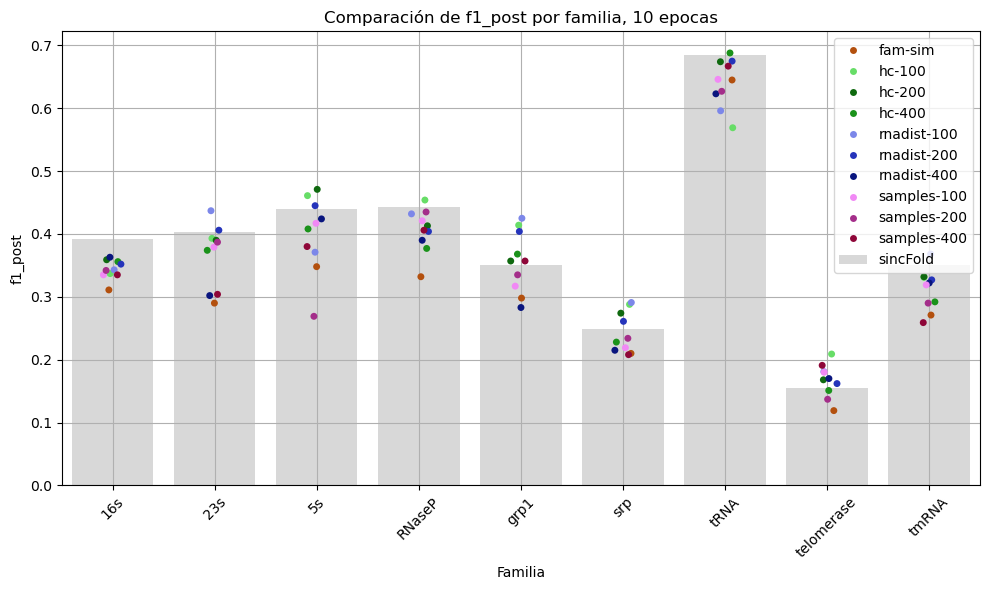

In [8]:
# Transformar a formato long
dfl_10 = df_10.melt(
    id_vars="fam", value_vars=experiments, var_name="modelo", value_name="f1_post"
)
# Visualización categórica
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=dfl_10,
    x="fam",
    y="f1_post",
    hue="modelo",
    palette=palette,
)

sns.barplot(
    data=df_sincfold,
    x="fam",
    y="f1_post",
    color="gray",
    alpha=0.3,
    errorbar=None,
    label="sincFold",
)

plt.grid()
plt.title("Comparación de f1_post por familia, 10 epocas")
plt.ylabel("f1_post")
plt.xlabel("Familia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
dfl_5.sort_values(by="modelo", ascending=False)

,fam,modelo,f1_post
89,tmRNA,samples-400,0.349
88,telomerase,samples-400,0.210
87,tRNA,samples-400,0.646
86,srp,samples-400,0.239
85,grp1,samples-400,0.360
...,...,...,...
1,23s,fam-sim,0.298
6,tRNA,fam-sim,0.644
7,telomerase,fam-sim,0.196
8,tmRNA,fam-sim,0.331


## Compare 5 vs 10

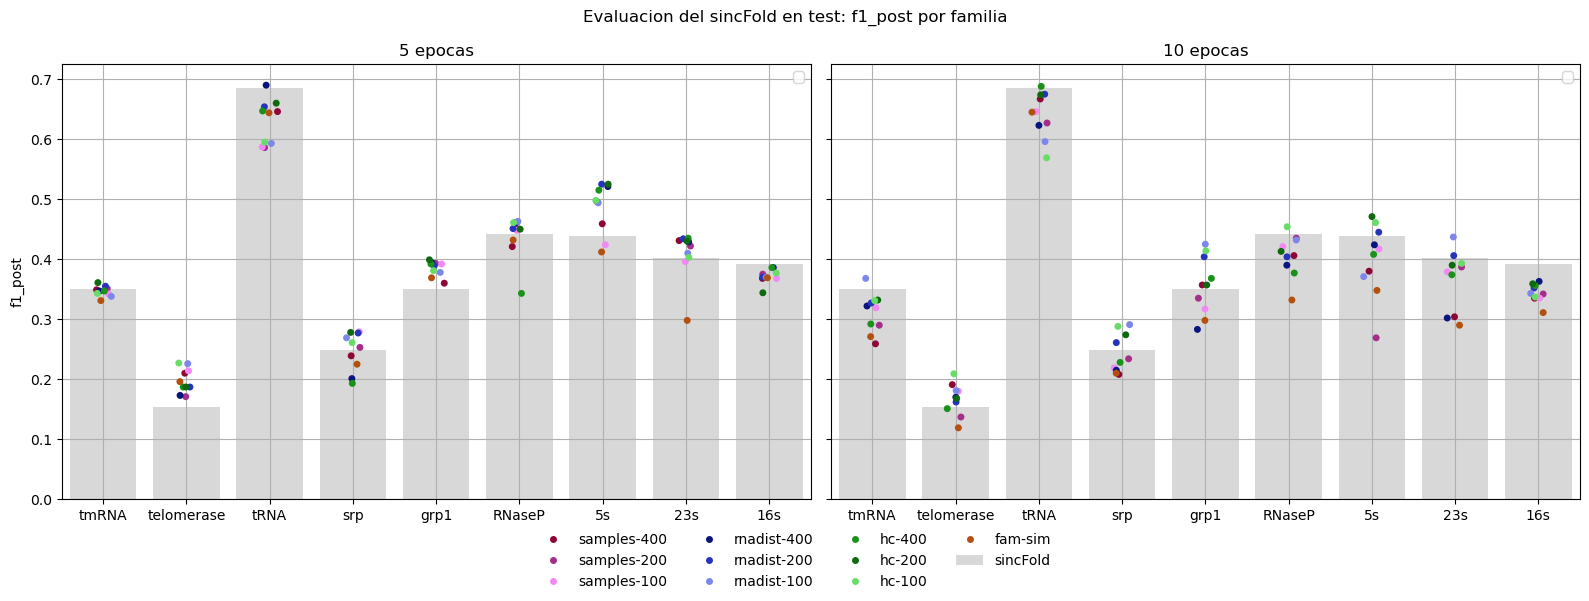

In [10]:
# Visualización categórica
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.stripplot(
    data=dfl_5.sort_values(by="modelo", ascending=False),
    x="fam",
    y="f1_post",
    hue="modelo",
    palette=palette,
    ax=axes[0],
)

sns.barplot(
    data=df_sincfold,
    x="fam",
    y="f1_post",
    color="gray",
    alpha=0.3,
    errorbar=None,
    ax=axes[0],
    legend=False,
)

sns.stripplot(
    data=dfl_10.sort_values(by="modelo", ascending=False),
    x="fam",
    y="f1_post",
    hue="modelo",
    palette=palette,
    ax=axes[1],
)

sns.barplot(
    data=df_sincfold,
    x="fam",
    y="f1_post",
    color="gray",
    alpha=0.3,
    errorbar=None,
    label="sincFold",
    ax=axes[1],
)
axes[0].grid()
axes[0].legend([])
axes[1].legend([])
axes[0].set_xlabel("")
plt.grid()
axes[0].set_title("5 epocas")
axes[1].set_title("10 epocas")
fig.suptitle("Evaluacion del sincFold en test: f1_post por familia")
plt.ylabel("f1_post")
axes[0].tick_params(axis="x", rotation=0)
axes[1].tick_params(axis="x", rotation=0)
axes[1].set_xlabel("")

# Leyenda global
handles, labels = [], []
for ax in axes:
    h, l = ax.get_legend_handles_labels()
    handles += h
    labels += l
by_label = dict(zip(labels, handles))
fig.legend(
    by_label.values(), by_label.keys(), loc="lower center", ncol=4, frameon=False
)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

In [11]:
sincfold_series = pd.Series(sincfold_f1)


def normalizar_y_melt(df, sincfold_series, experiments):
    df_norm = df.copy()
    cols_to_normalize = [col for col in df.columns if col != "fam"]

    # Normalizar cada columna (vectorizado)
    df_norm[cols_to_normalize] = df_norm[cols_to_normalize].div(
        df_norm["fam"].map(sincfold_series), axis=0
    )

    # Transformar a formato long
    dfn = df_norm.melt(
        id_vars="fam",
        value_vars=experiments,
        var_name="modelo",
        value_name="f1_post",
    )

    return dfn


dfn5 = normalizar_y_melt(df_5, sincfold_series, experiments)
dfn10 = normalizar_y_melt(df_10, sincfold_series, experiments)

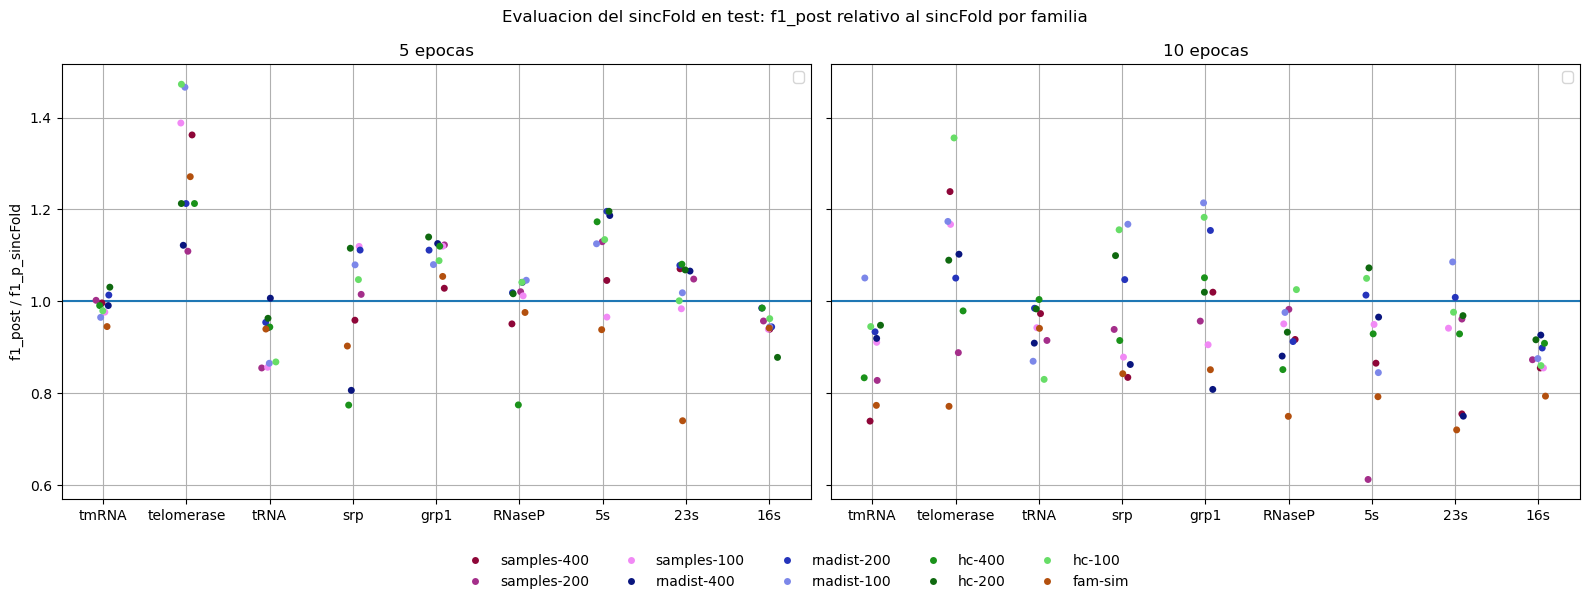

In [12]:
# Visualización categórica
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.stripplot(
    data=dfn5.sort_values(by="modelo", ascending=False),
    x="fam",
    y="f1_post",
    hue="modelo",
    palette=palette,
    ax=axes[0],
    s=5,
)

sns.stripplot(
    data=dfn10.sort_values(by="modelo", ascending=False),
    x="fam",
    y="f1_post",
    hue="modelo",
    palette=palette,
    ax=axes[1],
)

axes[0].grid()
axes[0].legend([])
axes[1].legend([])
axes[0].set_xlabel("")
plt.grid()
axes[0].set_title("5 epocas")
axes[1].set_title("10 epocas")
fig.suptitle(
    "Evaluacion del sincFold en test: f1_post relativo al sincFold por familia"
)
axes[0].set_ylabel("f1_post / f1_p_sincFold")
axes[0].tick_params(axis="x", rotation=0)
axes[1].tick_params(axis="x", rotation=0)
axes[1].set_xlabel("")
for ax in axes:
    ax.axhline(y=1)

# Leyenda global
handles, labels = [], []
for ax in axes:
    h, l = ax.get_legend_handles_labels()
    handles += h
    labels += l
by_label = dict(zip(labels, handles))
fig.legend(
    by_label.values(), by_label.keys(), loc="lower center", ncol=5, frameon=False
)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

In [13]:
dfn5

,fam,modelo,f1_post
0,16s,fam-sim,0.942134
1,23s,fam-sim,0.740501
2,5s,fam-sim,0.938567
3,RNaseP,fam-sim,0.976011
4,grp1,fam-sim,1.054379
...,...,...,...
85,grp1,samples-400,1.028663
86,srp,samples-400,0.959165
87,tRNA,samples-400,0.942869
88,telomerase,samples-400,1.362106


In [14]:
s = dfn5.groupby("modelo")["f1_post"].mean().sort_values().reset_index()
s = s.rename(columns={"f1_post": "rel_f1_post"})
s

,modelo,rel_f1_post
0,fam-sim,0.967905
1,hc-400,1.006393
2,samples-200,1.029155
3,samples-400,1.032989
4,rnadist-400,1.036963
5,samples-100,1.040334
6,rnadist-100,1.065698
7,hc-100,1.066279
8,hc-200,1.069165
9,rnadist-200,1.071399


In [15]:
s = dfn10.groupby("modelo")["f1_post"].mean().sort_values().reset_index()
s = s.rename(columns={"f1_post": "rel_f1_post"})
s

,modelo,rel_f1_post
0,fam-sim,0.804338
1,samples-200,0.884305
2,rnadist-400,0.903038
3,samples-400,0.911178
4,hc-400,0.933730
5,samples-100,0.944928
6,rnadist-200,1.000644
7,hc-200,1.003677
8,rnadist-100,1.028885
9,hc-100,1.042567


In [16]:
hc_1000 = pd.read_csv("results/tables/1000s/hc_1000s_f1_post_test.csv")
rdist_1000 = pd.read_csv("results/tables/1000s/rnadist_1000s_f1_post_test.csv")
samples_1000 = pd.read_csv("results/tables/1000s/samples_1000s_f1_post_test.csv")

dft_1000 = pd.merge(
    hc_1000, rdist_1000, left_on=["fam", "fam-sim"], right_on=["fam", "fam-sim"]
)
df_1000 = pd.merge(
    dft_1000, samples_1000, left_on=["fam", "fam-sim"], right_on=["fam", "fam-sim"]
)
df_1000

,fam,fam-sim,hc-100,hc-200,hc-400,rnadist-100,rnadist-200,rnadist-400,samples-100,samples-200,samples-400
0,16s,0.172,0.364,0.333,0.354,0.364,0.372,0.360,0.339,0.371,0.353
1,23s,0.419,0.419,0.426,0.421,0.423,0.430,0.434,0.424,0.413,0.394
2,5s,0.439,0.393,0.470,0.391,0.436,0.500,0.408,0.395,0.475,0.490
3,RNaseP,0.330,0.482,0.449,0.468,0.480,0.460,0.465,0.447,0.458,0.446
4,grp1,0.395,0.417,0.372,0.407,0.413,0.395,0.400,0.370,0.381,0.374
5,srp,0.253,0.283,0.276,0.214,0.299,0.277,0.251,0.279,0.260,0.256
6,tRNA,0.617,0.637,0.657,0.631,0.590,0.653,0.656,0.553,0.556,0.662
7,telomerase,0.202,0.206,0.178,0.224,0.211,0.181,0.224,0.204,0.176,0.198
8,tmRNA,0.334,0.343,0.364,0.360,0.342,0.364,0.362,0.335,0.340,0.347


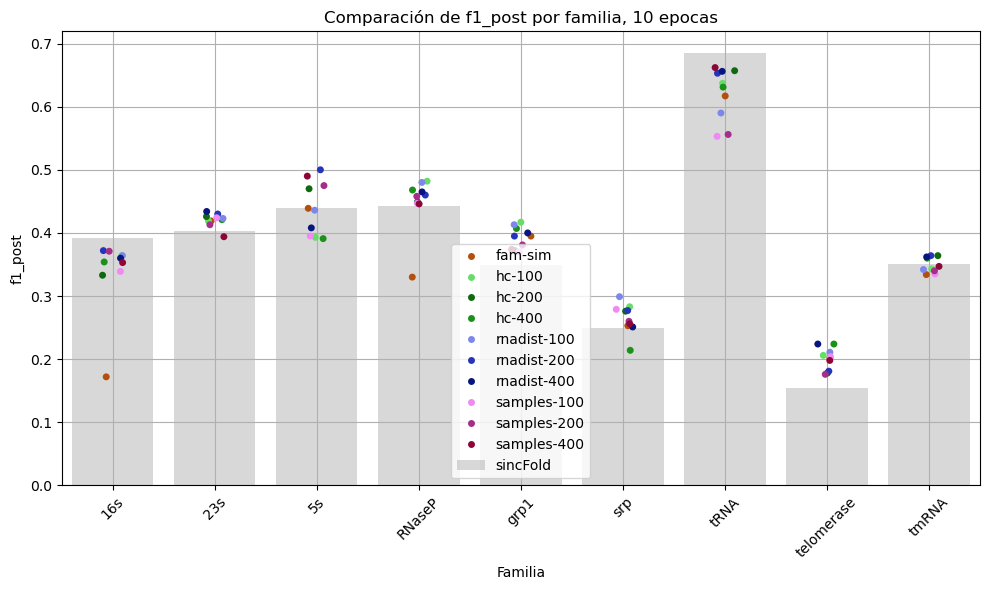

In [17]:
# Transformar a formato long
dfl_1000 = df_1000.melt(
    id_vars="fam", value_vars=experiments, var_name="modelo", value_name="f1_post"
)
# Visualización categórica
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=dfl_1000,
    x="fam",
    y="f1_post",
    hue="modelo",
    palette=palette,
)

sns.barplot(
    data=df_sincfold,
    x="fam",
    y="f1_post",
    color="gray",
    alpha=0.3,
    errorbar=None,
    label="sincFold",
)

plt.grid()
plt.title("Comparación de f1_post por familia, 10 epocas")
plt.ylabel("f1_post")
plt.xlabel("Familia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
hc_2000 = pd.read_csv("results/tables/2000s/hc_2000s_f1_post_test.csv")
rdist_2000 = pd.read_csv("results/tables/2000s/rnadist_2000s_f1_post_test.csv")
samples_2000 = pd.read_csv("results/tables/2000s/samples_2000s_f1_post_test.csv")

dft_2000 = pd.merge(
    hc_2000, rdist_2000, left_on=["fam", "fam-sim"], right_on=["fam", "fam-sim"]
)
df_2000 = pd.merge(
    dft_2000, samples_2000, left_on=["fam", "fam-sim"], right_on=["fam", "fam-sim"]
)
df_2000

,fam,fam-sim,hc-100,hc-200,hc-400,rnadist-100,rnadist-200,rnadist-400,samples-100,samples-200,samples-400
0,16s,0.322,0.347,0.362,0.377,0.340,0.360,0.381,0.330,0.359,0.347
1,23s,0.423,0.436,0.409,0.425,0.432,0.425,0.449,0.425,0.397,0.406
2,5s,0.417,0.351,0.453,0.412,0.355,0.487,0.423,0.385,0.398,0.507
3,RNaseP,0.345,0.419,0.415,0.449,0.419,0.370,0.454,0.416,0.434,0.429
4,grp1,0.365,0.347,0.284,0.392,0.303,0.276,0.388,0.367,0.330,0.376
5,srp,0.236,0.187,0.277,0.229,0.209,0.286,0.250,0.210,0.243,0.244
6,tRNA,0.434,0.627,0.668,0.665,0.589,0.669,0.646,0.567,0.674,0.694
7,telomerase,0.211,0.197,0.175,0.219,0.177,0.115,0.218,0.178,0.158,0.211
8,tmRNA,0.320,0.313,0.299,0.350,0.356,0.333,0.359,0.296,0.312,0.329


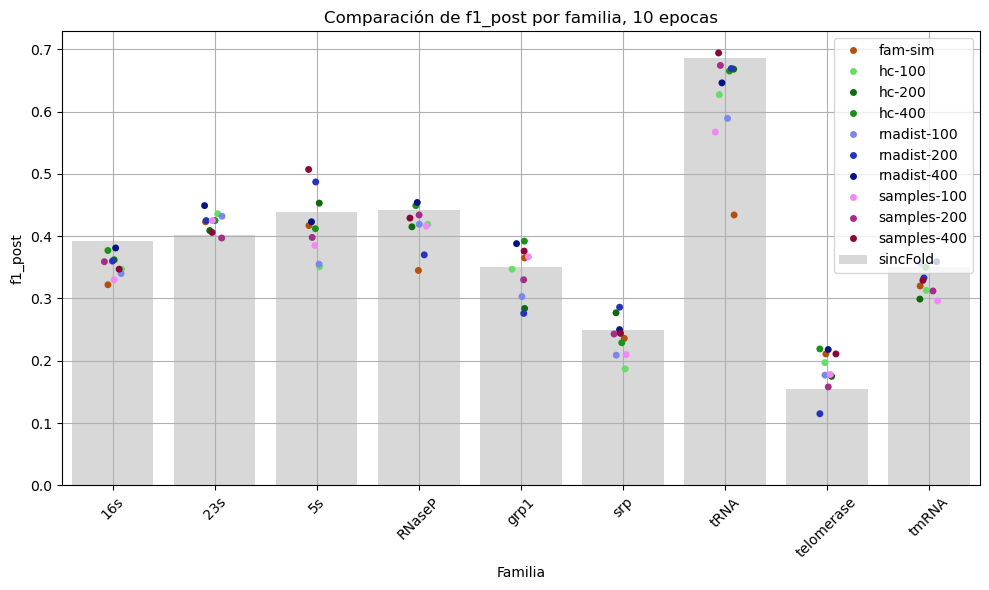

In [19]:
# Transformar a formato long
dfl_2000 = df_2000.melt(
    id_vars="fam", value_vars=experiments, var_name="modelo", value_name="f1_post"
)
# Visualización categórica
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=dfl_2000,
    x="fam",
    y="f1_post",
    hue="modelo",
    palette=palette,
)

sns.barplot(
    data=df_sincfold,
    x="fam",
    y="f1_post",
    color="gray",
    alpha=0.3,
    errorbar=None,
    label="sincFold",
)

plt.grid()
plt.title("Comparación de f1_post por familia, 10 epocas")
plt.ylabel("f1_post")
plt.xlabel("Familia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

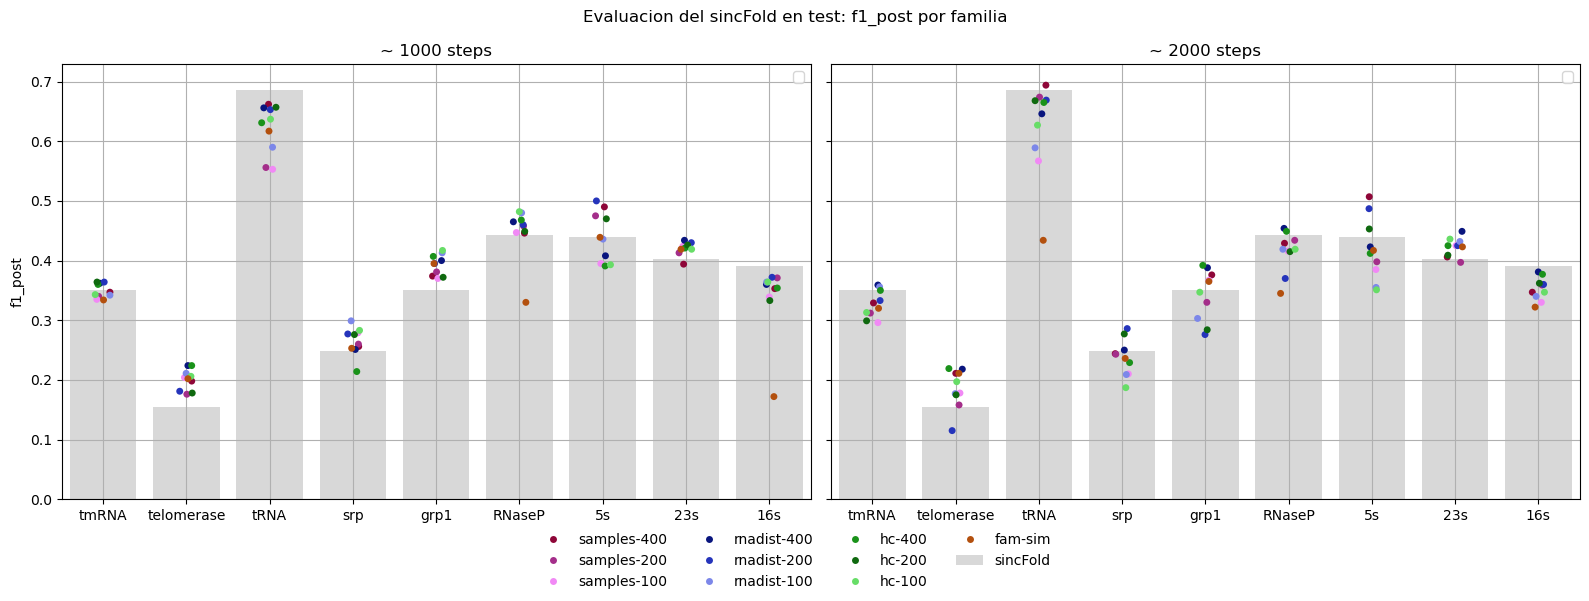

In [20]:
# Visualización categórica
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.stripplot(
    data=dfl_1000.sort_values(by="modelo", ascending=False),
    x="fam",
    y="f1_post",
    hue="modelo",
    palette=palette,
    ax=axes[0],
)

sns.barplot(
    data=df_sincfold,
    x="fam",
    y="f1_post",
    color="gray",
    alpha=0.3,
    errorbar=None,
    ax=axes[0],
    legend=False,
)

sns.stripplot(
    data=dfl_2000.sort_values(by="modelo", ascending=False),
    x="fam",
    y="f1_post",
    hue="modelo",
    palette=palette,
    ax=axes[1],
)

sns.barplot(
    data=df_sincfold,
    x="fam",
    y="f1_post",
    color="gray",
    alpha=0.3,
    errorbar=None,
    label="sincFold",
    ax=axes[1],
)
axes[0].grid()
axes[0].legend([])
axes[1].legend([])
axes[0].set_xlabel("")
plt.grid()
axes[0].set_title("~ 1000 steps")
axes[1].set_title("~ 2000 steps")
fig.suptitle("Evaluacion del sincFold en test: f1_post por familia")
axes[0].set_ylabel("f1_post")
axes[0].tick_params(axis="x", rotation=0)
axes[1].tick_params(axis="x", rotation=0)
axes[1].set_xlabel("")

# Leyenda global
handles, labels = [], []
for ax in axes:
    h, l = ax.get_legend_handles_labels()
    handles += h
    labels += l
by_label = dict(zip(labels, handles))
fig.legend(
    by_label.values(), by_label.keys(), loc="lower center", ncol=4, frameon=False
)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

In [21]:
dfn1000 = normalizar_y_melt(df_1000, sincfold_series, experiments)
dfn2000 = normalizar_y_melt(df_2000, sincfold_series, experiments)

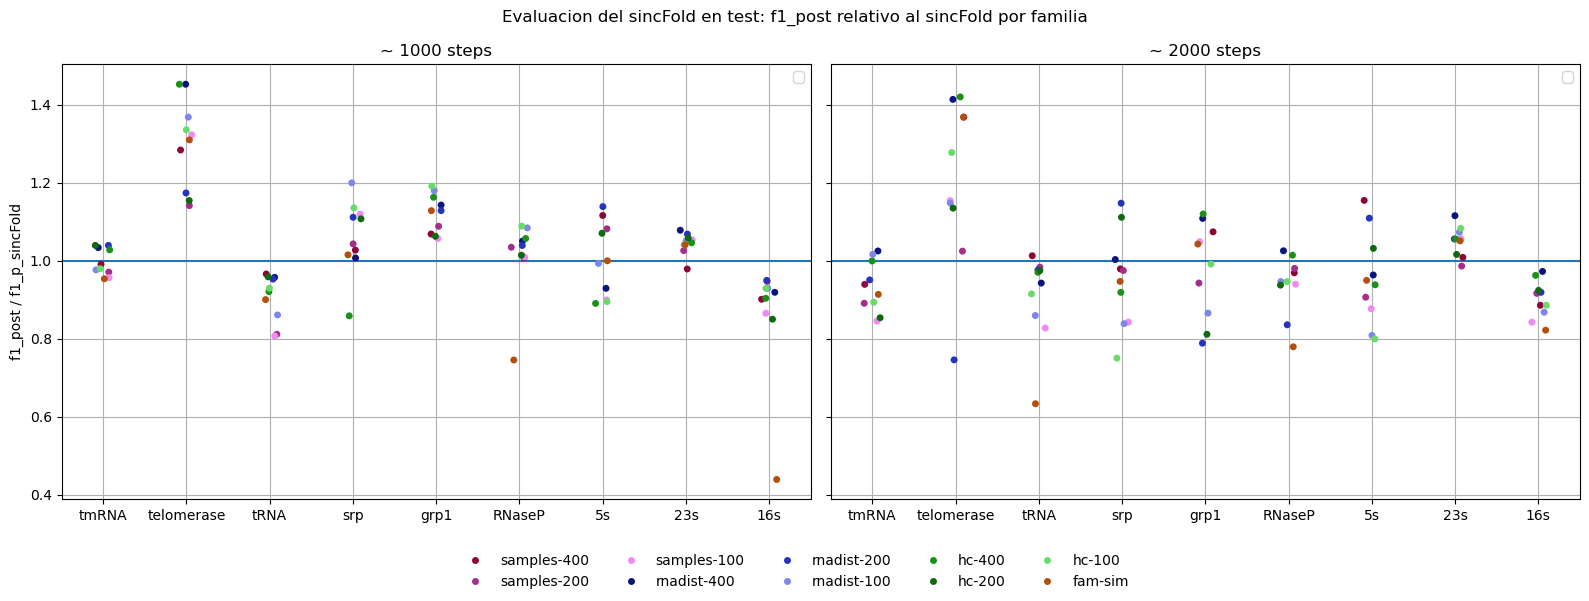

In [22]:
# Visualización categórica
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.stripplot(
    data=dfn1000.sort_values(by="modelo", ascending=False),
    x="fam",
    y="f1_post",
    hue="modelo",
    palette=palette,
    ax=axes[0],
    s=5,
)

sns.stripplot(
    data=dfn2000.sort_values(by="modelo", ascending=False),
    x="fam",
    y="f1_post",
    hue="modelo",
    palette=palette,
    ax=axes[1],
)

axes[0].grid()
axes[0].legend([])
axes[1].legend([])
axes[0].set_xlabel("")
plt.grid()
axes[0].set_title("~ 1000 steps")
axes[1].set_title("~ 2000 steps")
fig.suptitle(
    "Evaluacion del sincFold en test: f1_post relativo al sincFold por familia"
)
axes[0].set_ylabel("f1_post / f1_p_sincFold")
axes[0].tick_params(axis="x", rotation=0)
axes[1].tick_params(axis="x", rotation=0)
axes[1].set_xlabel("")
for ax in axes:
    ax.axhline(y=1)

# Leyenda global
handles, labels = [], []
for ax in axes:
    h, l = ax.get_legend_handles_labels()
    handles += h
    labels += l
by_label = dict(zip(labels, handles))
fig.legend(
    by_label.values(), by_label.keys(), loc="lower center", ncol=5, frameon=False
)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

In [23]:
s = dfn1000.groupby("modelo")["f1_post"].mean().sort_values().reset_index()
s = s.rename(columns={"f1_post": "rel_f1_post"})
s

,modelo,rel_f1_post
0,fam-sim,0.948293
1,samples-100,1.010319
2,samples-200,1.016285
3,hc-200,1.035283
4,hc-400,1.035764
5,samples-400,1.037978
6,hc-100,1.058619
7,rnadist-400,1.063571
8,rnadist-200,1.067068
9,rnadist-100,1.071634


In [24]:
s = dfn2000.groupby("modelo")["f1_post"].mean().sort_values().reset_index()
s = s.rename(columns={"f1_post": "rel_f1_post"})
s

,modelo,rel_f1_post
0,rnadist-100,0.936216
1,samples-100,0.937165
2,fam-sim,0.945408
3,rnadist-200,0.947824
4,hc-100,0.949384
5,samples-200,0.956454
6,hc-200,0.977481
7,samples-400,1.043755
8,hc-400,1.044603
9,rnadist-400,1.063552
